# 주성분 분석 (PCA, Principal Component Analysis)

## 개요
주성분 분석(PCA)은 고차원 데이터를 저차원으로 변환하여 데이터의 주요 패턴을 추출하는 차원 축소 기법입니다. PCA는 데이터의 분산(variance)을 최대한 보존하면서 상관관계가 있는 변수를 서로 독립적인 새로운 축(주성분)으로 변환합니다.

---

## 주요 특징
1. **차원 축소**: 많은 변수를 소수의 주성분으로 변환하여 데이터의 복잡성을 줄임.
2. **분산 보존**: 최대한 많은 데이터 분산을 유지하면서 정보 손실 최소화.
3. **상관성 제거**: 기존 변수 간의 상관성을 제거하여 독립적인 축으로 표현.
4. **데이터 시각화**: 저차원 공간에서 데이터의 분포를 시각화하기에 유용함.

---

## PCA의 단계
1. **데이터 표준화**:
   - 각 변수의 평균을 0, 분산을 1로 변환하여 스케일 차이를 제거함.
2. **공분산 행렬 계산**:
   - 변수 간의 공분산을 계산하여 데이터의 분포를 이해함.
3. **고유값 및 고유벡터 계산**:
   - 공분산 행렬에서 고유값과 고유벡터를 추출함.
   - 고유값은 주성분이 설명하는 분산의 크기를 나타냄.
   - 고유벡터는 주성분의 방향을 정의함.
4. **주성분 선택**:
   - 고유값의 크기 순으로 가장 큰 k개의 주성분을 선택함.
5. **데이터 변환**:
   - 원본 데이터를 선택한 주성분으로 투영하여 새로운 저차원 데이터셋을 생성함.

---

## 수학적 이해
- 공분산 행렬 \( \Sigma \): \( \Sigma = \frac{1}{n-1} X^T X \)
- 고유값 문제: \( \Sigma v = \lambda v \)
  - \( v \): 고유벡터 (주성분 축)
  - \( \lambda \): 고유값 (분산의 크기)

---

## 활용 사례
1. **이미지 압축**: 고차원 이미지 데이터를 저차원으로 압축하여 저장 공간 절약.
2. **노이즈 제거**: 중요하지 않은 데이터를 제거하여 신호 개선.
3. **데이터 시각화**: 2D 또는 3D로 변환하여 데이터의 군집 구조 분석.
4. **특성 선택**: 모델 성능 향상을 위해 중요한 변수만 선택.

---

## 주의점
1. **데이터 스케일링 필요**: 변수 간의 단위가 다를 경우 정확한 분석이 어려움.
2. **해석의 어려움**: 변환된 주성분이 원래 변수와 어떤 의미가 있는지 파악이 어려움.
3. **정보 손실 가능성**: 축소 과정에서 일부 데이터 정보가 손실될 수 있음.

---

In [5]:
# 외부 URL에서 데이터 파일을 다운로드함
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

# NumPy 라이브러리 임포트
import numpy as np

# 'fruits_300.npy' 파일을 로드하여 NumPy 배열로 변환
# fruits는 (300, 100, 100) 형태의 배열이며, 300개의 100x100 픽셀 이미지 데이터를 포함함
fruits = np.load('fruits_300.npy')

# 이미지 데이터를 2차원 배열로 변환
# (300, 100, 100) 배열을 (300, 10000)으로 변환하여
# 각 이미지(100x100)를 1차원 벡터(10000 길이)로 펼침
fruits_2d = fruits.reshape(-1, 100*100)

--2024-11-20 23:07:46--  https://bit.ly/fruits_300_data
bit.ly (bit.ly) 해석 중... 67.199.248.10, 67.199.248.11
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.10|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [따라감]
--2024-11-20 23:07:47--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
github.com (github.com) 해석 중... 20.200.245.247
다음으로 연결 중: github.com (github.com)|20.200.245.247|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 302 Found
위치: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [따라감]
--2024-11-20 23:07:47--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 3000128 (2.9M) [application/o

In [6]:
# PCA(Pricipal Component Analysis) 기능을 제공하는 scikit-learn의 모듈 임포트
from sklearn.decomposition import PCA

# PCA 객체 생성
# n_components=50은 데이터를 50개의 주성분으로 축소하겠다는 의미
pca = PCA(n_components=50)

# PCA 모델을 fruits_2d 데이터에 적합시킴 (학습)
# 데이터의 분산을 최대한 보존하면서 50차원으로 축소할 수 있는 주성분을 계산함
pca.fit(fruits_2d)

# PCA 결과의 주성분(Principal Components)의 크기를 출력
# pca.components_는 (50, 10000) 형태의 배열로,
# 각 행은 축소된 차원의 주성분 벡터(길이 10000, 원래 데이터 차원)를 나타냄
print(pca.components_.shape)

(50, 10000)


In [9]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    """
    입력 배열의 이미지를 격자로 시각화하는 함수
    - arr: 시각화할 이미지 배열. 각 원소는 2차원 배열로, 흑백 이미지를 나타냄.
    - ratio: 출력 이미지 크기를 조정하기 위한 배율 (기본값: 1)
    """
    
    n = len(arr)  # 시각화할 이미지 배열의 총 개수를 계산함
    
    rows = int(np.ceil(n / 10))  # 한 줄에 최대 10개씩 배치할 때 필요한 행의 수를 계산
    cols = n if rows < 2 else 10  # 행이 1개라면 열 수는 배열 크기, 그 외에는 10개로 고정
    
    # 전체 이미지를 출력할 격자형 플롯을 생성
    # figsize는 격자의 가로와 세로 크기를 결정 (각 칸의 크기를 ratio로 조정)
    fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
    
    for i in range(rows):  # 행 단위로 반복
        for j in range(cols):  # 열 단위로 반복
            if i * 10 + j < n:  # 배열의 유효한 이미지 인덱스인지 확인
                axs[i, j].imshow(arr[i * 10 + j], cmap='gray_r')  # 이미지를 흑백 반전(cmap='gray_r')으로 표시
            axs[i, j].axis('off')  # 축 눈금을 숨겨 깔끔하게 보이도록 설정
    
    plt.show()  # 생성된 플롯을 화면에 표시

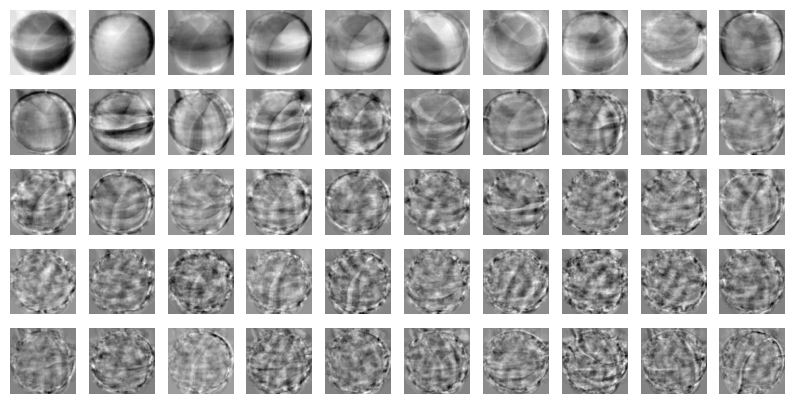

In [10]:
# PCA 주성분을 시각화하기 위해 draw_fruits 함수를 호출함
# PCA 주성분(pca.components_)은 (50, 10000) 배열로,
# 이를 이미지 형태(100x100)로 변환한 뒤 시각화

draw_fruits(pca.components_.reshape(-1, 100, 100))

In [11]:
# fruits_2d 배열의 형상(shape)을 출력
# fruits_2d는 원본 이미지 데이터를 2차원 배열로 변환한 결과로
# 300개의 이미지가 있으며, 각 이미지는 10000개의 픽셀을 1차원 배열로 나열한 형태임

print(fruits_2d.shape)

(300, 10000)


In [14]:
# PCA를 통해 2차원 데이터(fruits_2d)를 변환
# pca.transform()은 학습된 PCA 모델을 사용하여 데이터를 주성분 공간으로 변환함
# 즉, fruits_2d 데이터를 50차원으로 축소하여 fruits_pca 배열을 생성

fruits_pca = pca.transform(fruits_2d)

# 변환된 fruits_pca 배열의 형상 출력
# fruits_pca는 (300, 50) 배열로, 300개의 이미지를 50차원으로 변환한 결과를 나타냄
print(fruits_pca.shape)

(300, 50)


In [15]:
# PCA로 축소된 데이터(fruits_pca)를 원래의 10000차원 공간으로 복원
# pca.inverse_transform()은 PCA 변환된 데이터를 원래 차원으로 되돌리는 함수
# fruits_pca는 50차원으로 축소된 데이터이므로, 이를 다시 10000차원으로 복원함

fruits_inverse = pca.inverse_transform(fruits_pca)

# 복원된 fruits_inverse 배열의 형상 출력
# fruits_inverse는 (300, 10000) 배열로, 원래 데이터 차원으로 복원된 결과
print(fruits_inverse.shape)

(300, 10000)


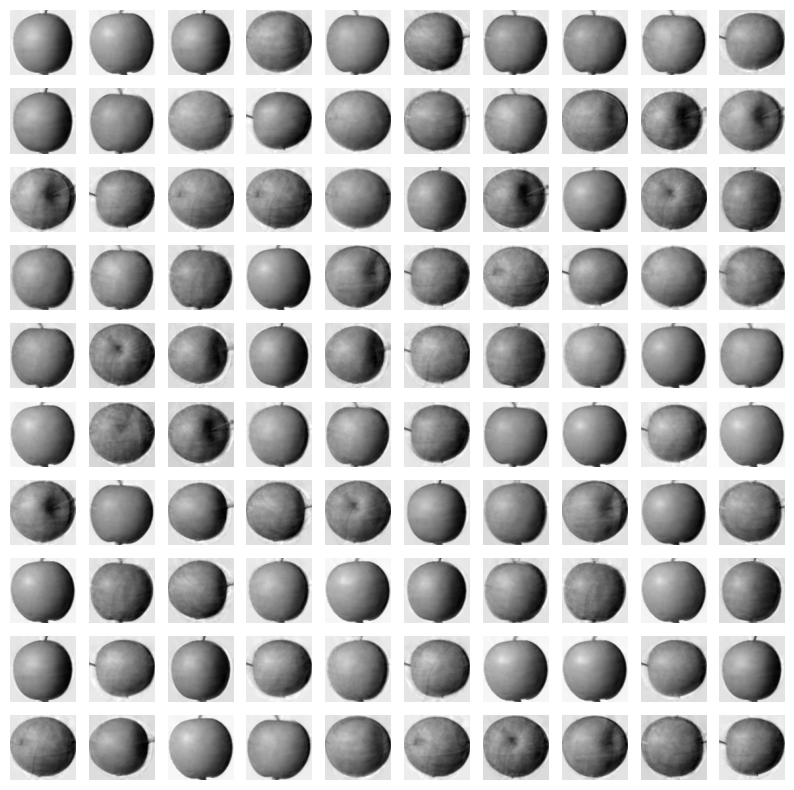

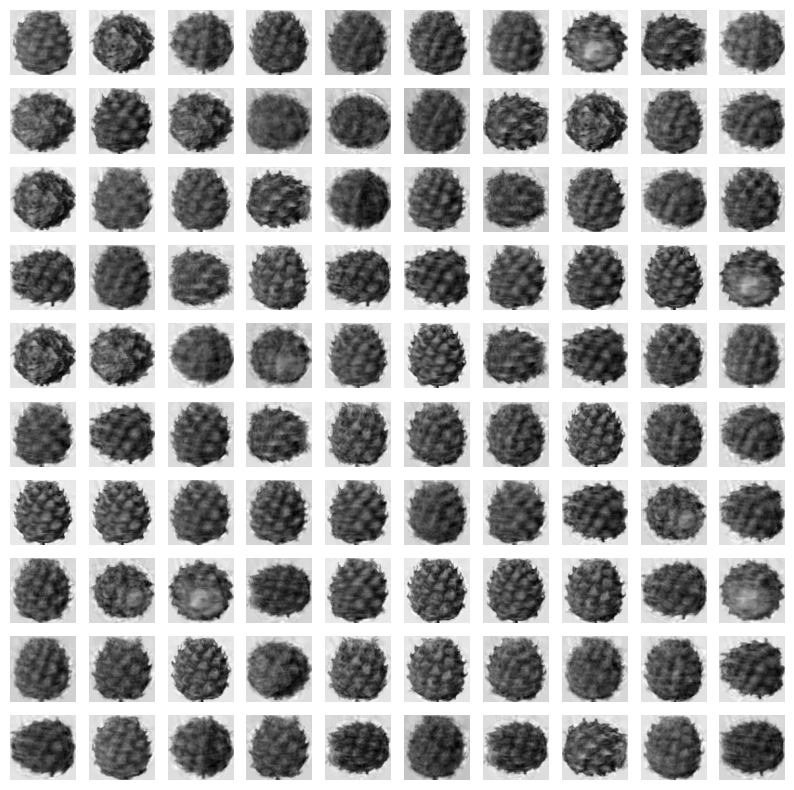

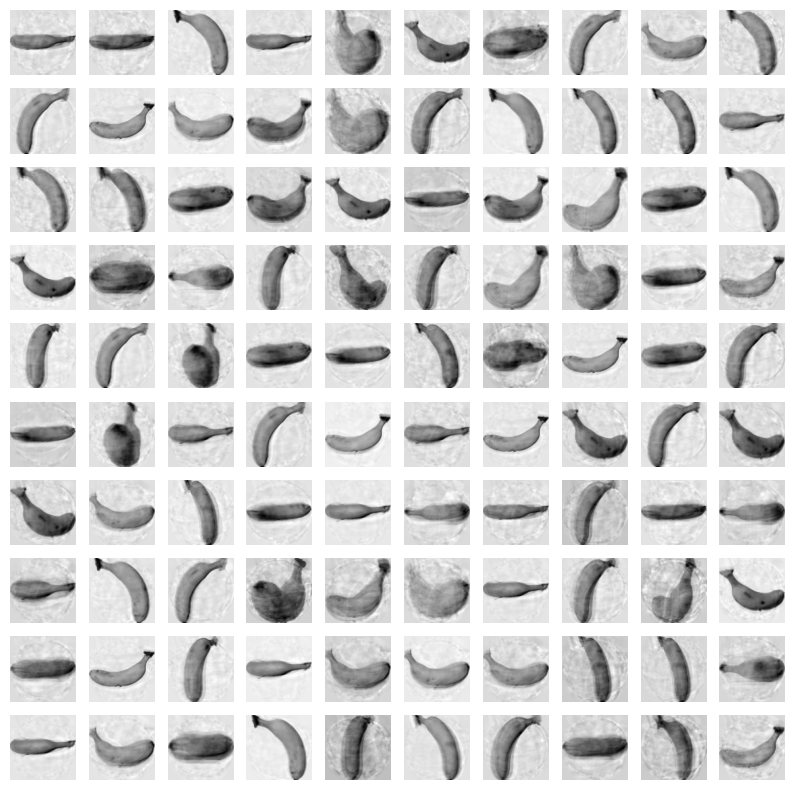

In [18]:
# PCA로 복원된 데이터를 다시 원래의 이미지 형태(100x100)로 재구성
# fruits_inverse 배열은 (300, 10000) 형태이므로, 이를 (300, 100, 100) 형태로 변환하여 각 이미지를 2D로 표현

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

# start 값을 [0, 100, 200]로 설정하여, 각 인덱스에서 100개의 이미지를 시각화
# draw_fruits 함수는 인덱스 범위에 해당하는 이미지를 시각화함
# 첫 번째 시작 값은 0, 두 번째는 100, 세 번째는 200으로 100개씩 이미지 그룹을 처리함

for start in [0, 100, 200]:
    # 100개씩 묶어서 draw_fruits 함수로 시각화
    draw_fruits(fruits_reconstruct[start:start+100])
    # 각 그룹마다 출력 간 구분을 위해 줄바꿈
    print("\n")

# 설명된 분산 (Explained Variance)

## 개요
설명된 분산(Explained Variance)은 주성분 분석(PCA)에서 각 주성분이 데이터의 분산을 얼마나 설명하는지를 나타내는 지표입니다. 이는 주성분이 데이터의 변동성을 얼마나 잘 보존하고 있는지를 측정하는 데 사용됩니다.

---

## 주요 개념
1. **분산의 중요성**:
   - 데이터의 분산은 데이터의 변동성(variability)을 나타냄.
   - PCA는 분산을 기준으로 중요한 주성분을 선택함.
2. **설명된 분산**:
   - 특정 주성분이 설명하는 데이터 전체 분산의 비율.
   - 값이 클수록 해당 주성분이 데이터를 더 잘 표현함.
3. **누적 설명된 분산**:
   - 선택된 여러 주성분이 설명하는 전체 분산의 누적 비율.
   - 선택한 주성분들이 데이터의 변동성을 얼마나 잘 보존하는지 평가 가능.

---

## 수학적 정의
- 공분산 행렬의 고유값 \( \lambda_i \)는 각 주성분의 분산을 나타냄.
- 설명된 분산 비율:
  \[
  \text{Explained Variance Ratio} = \frac{\lambda_i}{\sum_{j=1}^m \lambda_j}
  \]
  - \( \lambda_i \): 특정 주성분의 고유값.
  - \( m \): 전체 주성분의 개수.

---

## 해석
1. **개별 주성분**:
   - 설명된 분산 비율이 높을수록 해당 주성분이 데이터를 더 잘 표현.
2. **누적 설명된 분산**:
   - 여러 주성분을 합쳐서 데이터 전체를 얼마나 잘 표현하는지 확인.
   - 일반적으로 누적 설명된 분산이 80~90% 이상이면 충분히 데이터의 주요 정보를 보존한다고 판단함.

---


In [21]:
# PCA 모델이 설명하는 데이터의 총 분산 비율을 출력
# pca.explained_variance_ratio_는 각 주성분이 설명하는 분산 비율을 담고 있음
# np.sum()을 사용하여 모든 주성분이 설명하는 분산 비율의 합을 구함

print(np.sum(pca.explained_variance_ratio_))

0.9215578197677256


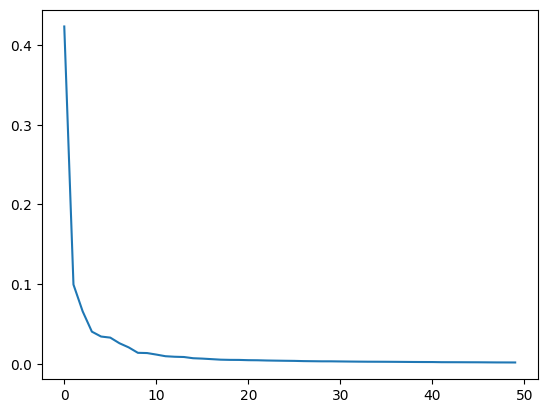

In [22]:
# PCA 주성분이 설명하는 분산 비율을 시각화하기 위해 플로팅
# pca.explained_variance_ratio_는 각 주성분이 설명하는 분산의 비율을 나타내는 배열
# 이 배열의 값을 y축으로 하여, 주성분별 설명된 분산 비율을 그래프로 출력함

plt.plot(pca.explained_variance_ratio_)

# 그래프를 화면에 표시
plt.show()

In [23]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀 모델을 초기화
# LogisticRegression은 다중 클래스 분류 문제를 해결하기 위한 선형 모델임
lr = LogisticRegression()

# target 배열 생성: 0, 1, 2 세 가지 클래스를 100개씩 포함하는 배열
# 0이 100개, 1이 100개, 2가 100개인 배열을 생성하여 분류 대상 라벨을 지정
target = np.array([0]*100 + [1]*100 + [2]*100)

In [26]:
from sklearn.model_selection import cross_validate

# cross_validate() 함수는 주어진 모델을 교차 검증하여 성능을 평가
# 여기서는 로지스틱 회귀 모델(lr)을 사용하여 fruits_2d 데이터를 target 레이블에 대해 교차 검증을 수행
# cross_validate는 모델 학습 시간(fit_time)과 테스트 성능(test_score)을 포함한 다양한 정보를 반환

scores = cross_validate(lr, fruits_2d, target)

# 교차 검증의 평균 테스트 정확도(test_score)의 평균을 출력
# test_score는 각 교차 검증 fold에서의 테스트 정확도를 나타내므로, 그 평균을 구함
print(np.mean(scores['test_score']))

# 교차 검증의 평균 학습 시간(fit_time)을 출력
# fit_time은 모델 학습에 소요된 시간을 각 fold마다 기록하므로, 그 평균을 구함
print(np.mean(scores['fit_time']))

0.9966666666666667
0.11102414131164551


In [28]:
# PCA로 축소된 데이터(fruits_pca)를 사용하여 교차 검증 수행
# fruits_2d 대신 fruits_pca를 사용하여 로지스틱 회귀 모델의 성능을 평가
# fruits_pca는 차원 축소된 데이터이므로, 더 적은 수의 특성을 사용하여 모델을 훈련

scores = cross_validate(lr, fruits_pca, target)

# 교차 검증의 평균 테스트 정확도(test_score)의 평균을 출력
# test_score는 각 교차 검증 fold에서의 테스트 정확도를 나타내므로, 그 평균을 구함
print(np.mean(scores['test_score']))

# 교차 검증의 평균 학습 시간(fit_time)을 출력
# fit_time은 모델 학습에 소요된 시간을 각 fold마다 기록하므로, 그 평균을 구함
print(np.mean(scores['fit_time']))

0.9966666666666667
0.005037736892700195


In [30]:
# PCA를 사용하여 데이터의 주성분을 축소하는데, n_components=0.5로 설정하여
# 데이터의 분산의 50%만을 설명하는 주성분들만 선택하도록 설정
# 즉, 원본 데이터에서 설명할 수 있는 분산의 50%만 보존되도록 하여 차원을 축소함

pca = PCA(n_components=0.5)

# fruits_2d 데이터를 사용하여 PCA 모델을 학습시킴
# 이때, PCA는 50%의 분산을 설명하는 주성분의 개수를 자동으로 결정함
pca.fit(fruits_2d)

# PCA가 선택한 주성분의 개수를 출력
# n_components=0.5로 설정하면, 데이터의 분산을 50% 이상 설명하는 주성분 개수가 출력됨
print(pca.n_components_)

2


In [31]:
# PCA로 차원 축소된 데이터(fruits_2d)를 변환
# fruits_2d 데이터를 PCA 모델에 적용하여, 50% 분산만 설명하는 새로운 주성분 공간으로 변환

fruits_pca = pca.transform(fruits_2d)

# PCA 변환 후 데이터의 형태를 출력
# fruits_pca는 원본 데이터(fruits_2d)가 선택된 주성분 공간으로 변환된 결과이므로
# 이 데이터의 형태는 주성분의 개수에 따라 달라짐 (예: n_components=0.5로 설정했을 때 주성분 개수)
print(fruits_pca.shape)

(300, 2)


In [32]:
# PCA로 차원 축소된 데이터(fruits_pca)를 사용하여 교차 검증 수행
# fruits_pca는 PCA를 통해 차원 축소된 데이터로, 이제 더 적은 차원에서 모델을 훈련하고 평가함

scores = cross_validate(lr, fruits_pca, target)

# 교차 검증의 평균 테스트 정확도(test_score)의 평균을 출력
# test_score는 각 교차 검증 fold에서의 테스트 정확도를 나타내므로, 그 평균을 구함
print(np.mean(scores['test_score']))

# 교차 검증의 평균 학습 시간(fit_time)을 출력
# fit_time은 모델 학습에 소요된 시간을 각 fold마다 기록하므로, 그 평균을 구함
print(np.mean(scores['fit_time']))

0.9933333333333334
0.008743190765380859


/Users/leesung-joon/jupyter_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/leesung-joon/jupyter_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [33]:
from sklearn.cluster import KMeans

# KMeans 클러스터링 알고리즘을 사용하여 데이터를 3개의 클러스터로 그룹화
# n_clusters=3은 클러스터의 개수를 3으로 설정
# random_state=42는 클러스터링 결과가 재현될 수 있도록 고정된 난수 시드를 사용

km = KMeans(n_clusters=3, random_state=42)

# fruits_pca 데이터를 사용하여 KMeans 클러스터링을 학습
# PCA로 축소된 데이터에서 클러스터링을 수행하여, 데이터 포인트들을 3개의 그룹으로 나눔
km.fit(fruits_pca)

# 클러스터링 결과에서 각 데이터 포인트가 속한 클러스터의 레이블을 출력
# np.unique는 레이블의 유니크 값과 각 값의 빈도를 반환
# 이 출력은 각 클러스터에 속하는 데이터 포인트의 개수를 보여줌
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


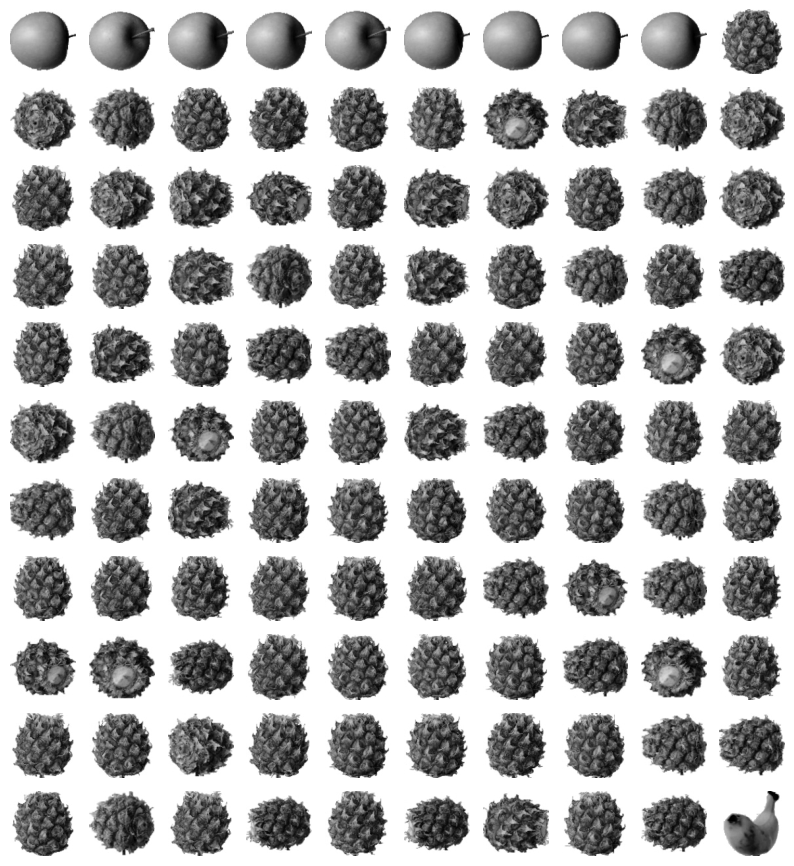

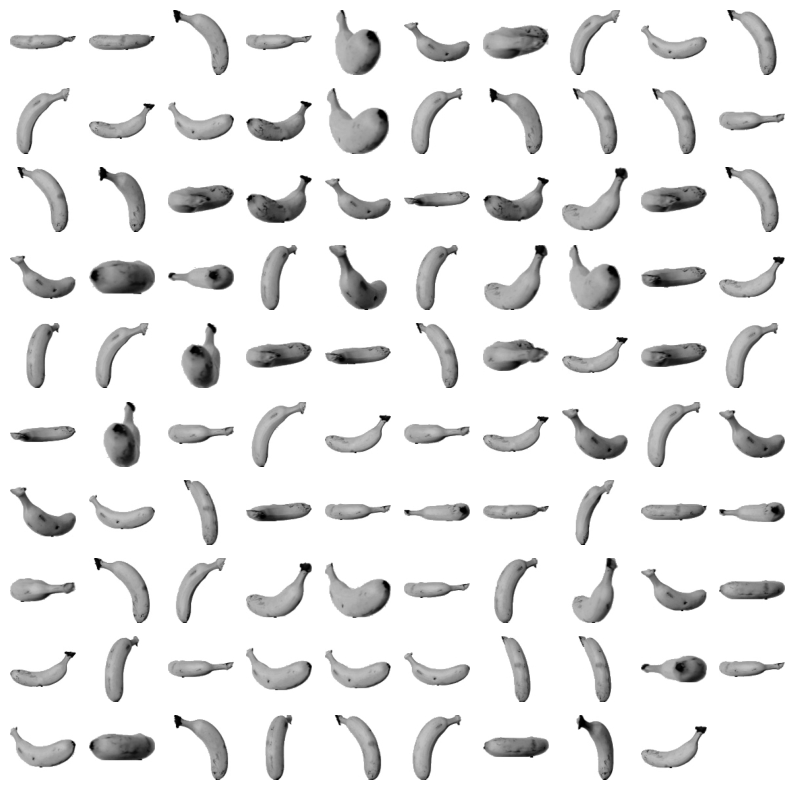

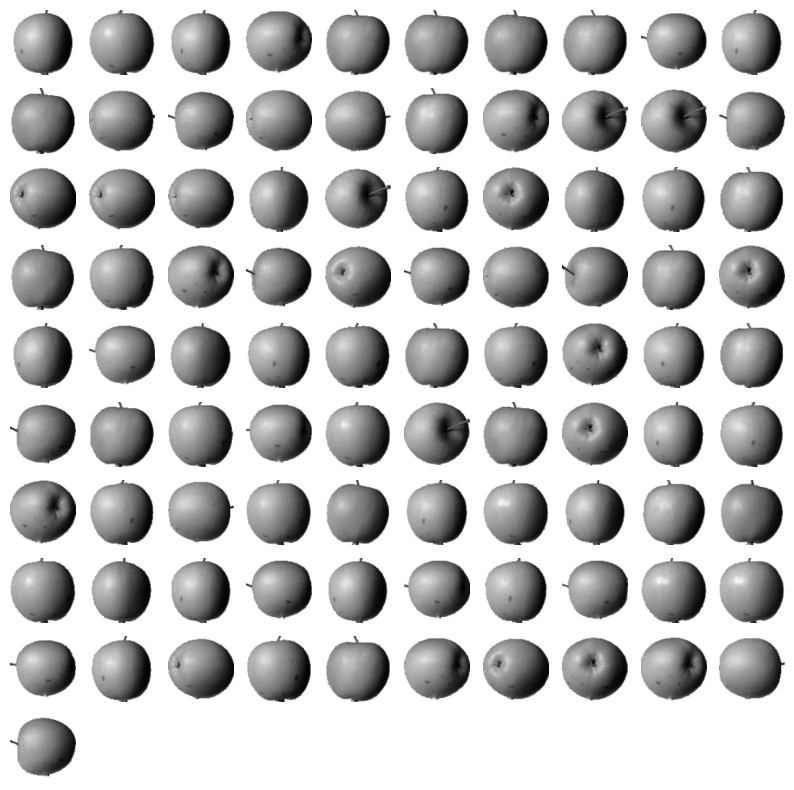

In [34]:
# 각 클러스터에 속하는 데이터 포인트들을 시각화하기 위해 반복문 사용
# 'label'은 0부터 2까지의 값을 가지며, 각 클러스터의 레이블을 나타냄

for label in range(0, 3):
    # km.labels_ == label: KMeans로 할당된 레이블이 현재 클러스터 번호(label)와 일치하는 데이터만 선택
    # fruits[km.labels_ == label]는 해당 레이블을 가진 데이터 포인트들만 선택하여 그리기
    draw_fruits(fruits[km.labels_ == label])

    # 각 클러스터가 그려진 후 줄바꿈을 추가
    print("\n")

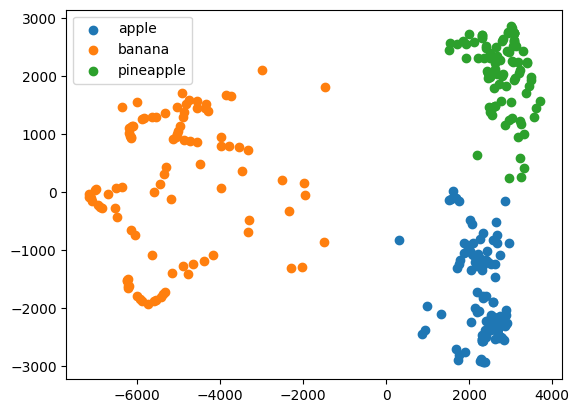

In [35]:
# 각 클러스터에 속하는 데이터를 2D 공간에 산점도로 시각화
# label은 클러스터의 레이블(0, 1, 2)로, 각 클러스터에 속하는 데이터를 시각화함

for label in range(0, 3):
    # km.labels_ == label: 해당 레이블을 가진 데이터 포인트들만 선택
    # fruits_pca[km.labels_ == label]: PCA로 축소된 데이터에서 현재 레이블(label)에 해당하는 데이터 선택
    data = fruits_pca[km.labels_ == label]
    
    # 선택된 데이터를 산점도로 시각화
    # data[:,0]은 첫 번째 주성분, data[:,1]은 두 번째 주성분을 의미
    # PCA로 축소된 데이터는 보통 첫 번째 두 주성분만 시각화하여 2D 공간에 표현함
    plt.scatter(data[:, 0], data[:, 1])

# 각 클러스터에 대해 레이블을 지정
# 각 클러스터의 산점도를 apple, banana, pineapple에 해당한다고 가정하여 레전드를 추가
plt.legend(['apple', 'banana', 'pineapple'])

# 그래프를 화면에 표시
plt.show()